# Image of a Black Hole
VANEL Mélina / 
January 2021

## Photons Geodesics

First of all, the trajectory of photons is studied. The Black hole has a mass M, it is a non rotative one and not charged one, called : Schwarzchild Black hole. In polar coordinate one can express geodesic equation as :  
 \begin{align}  \left(\frac{1}{r^2}\frac{\partial r}{\partial \theta} \right)^2 +\frac{1}{r^2}\left(1-\frac{r_s}{r} \right) = \frac{1}{b^2}\end{align}  
 Where b is the infinite impact parameter and $r_s = 2GM/c^2$ the Schwarzschild radius.


This equation can be re written using $u=r_s/r$ and $u_c = b_c/b$ with  $b_c = 3\sqrt(3)/2$ :  

 \begin{align}  \left(\frac{\partial u}{\partial \theta}\right)^2 + V(u) = 0   \end{align} 

With \begin{align} V(u) = u^2(1-u)-\frac{4}{27}u_c^2 \end{align}

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from pylab import *
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from matplotlib import ticker,cm

###########################
# Constants
###########################

G = 6.67*10**(-11)                  # Gravitation constant
Msoleil = 1.989*10**(30)            # Solar mass
M = 30*Msoleil                      # We consider a 30 solar mass black hole
c = 3.00*10**8                      # Speed light

rs = 2*G*M/c**2                     # Schwarzschild radius
bc = 3*np.sqrt(3)*rs/2


It is then possible to plot V(u) for different values of b the impact parameter.

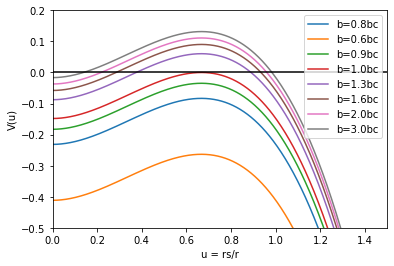

In [2]:
############################
# V(u) Definition
############################

def V(u,b):
    uc = bc/b
    return u**2*(1-u)-4/27*uc**2

def const(u):
    return 0*u

# Plotting V(u)
b=[0.8*bc,0.6*bc,0.9*bc,bc,1.3*bc,1.6*bc,2*bc,3*bc]
u = np.linspace(-1,2,2000)
for elem in b:
    plt.plot(u,V(u,elem),label='b='+str(elem/bc)+'bc')

plt.plot(u,const(u),'k')
plt.xlabel('u = rs/r')
plt.ylabel('V(u)')
plt.ylim([-0.5,0.2])
plt.xlim([0,1.5])
    
plt.legend()
plt.show()


It is possible to distinguish 2 different regimes :
- One for $b < b_c$, the arriving photon goes nearer than the limit trapping radius of the black hole. In this case, the arriving photons are trapped by the black hole. 
- On the other hand, for $ b > b_c $, the arriving photons are facing a potential barrier and are defleted by the black hole and go back to infinity.

In order to find the photon geodesics, the differential equation needs to be solved. It is easier to work with the derived equation  
\begin{align} u'' = 3/2u^2-u \end{align}

In order to solve this equation, the 4th order Runge Kutta method for second derivative differential equation is computed. The method is the following, if the equation to solve is $ u''=f(\theta,u,u') $ with $ f(\theta,u,u') = \frac{3}{2}u^2-u $. We then define :
$$ k_1 = f(\theta_n,u_n,u'_n) $$
$$ k_2 = f(\theta_n +\frac{h}{2},u_n+\frac{h}{2}u'_n,u'_n+\frac{h}{2}k_1) $$
$$ k_3 = f(\theta_n +\frac{h}{2},u_n+\frac{h}{2}u'_n+\frac{h^2}{4}k_1,u'_n+\frac{h}{2}k_2)$$
$$ k_4 = f(\theta_n +h,u_n+h*u'_n+\frac{h^2}{2}k_2,u'_n+h*k_3) $$

And then the solution will be deduced by :
$$ u_{n+1} = u_n + h*u'_n + \frac{h^2}{6}(k_1+k_2+k_3) $$
and 
$$ u'_{n+1} = u'_n + \frac{h}{6}(k_1+2k_2+2k_3+k_4) $$

For the resolution we consider that if a photon is deviated by the black hole at the point that it goes back to infinity we consider that it stayes at infinity and don't go back to the black hole (*).

In [3]:
# Function definition
def fonct(U):
    dudtheta = 3/2*U**2-U
    return dudtheta

In [4]:
# Parameter to define theta start and theta end in order to solve the equation between theta start and stop
start = 0
stop = 20
N=1000

In [5]:
def solve_equadiff(b):
    '''
    Solve differential equation u''=3/2u**2-u using 4th order Runge Kutta method for 2nd order differential equations
    Input : - b = impact parameter
    Output : ulist, uprimelist, theta
            - ulist = list of values of function u
            - uprimelist = list of values of derivative of u function
            - theta = list of theta on which the differential equation is solved
    '''
    
    uc = bc/b
    
    # Initialisation
    u0 = 0
    uprime0 = 2*uc/(3*np.sqrt(3))
    
    # Step
    h = (-start+stop)/(N-1)                     
    u=u0
    uprime=uprime0
    theta=np.linspace(start,stop,N)
    
    # Creation of ulist and uprimelist
    u_list=[]
    uprime_list=[]
    u_list.append(u)
    uprime_list.append(uprime)
    
    for i in range(len(theta)-1):
        k1 = fonct(u)
        k2 = fonct(u+h/2*uprime)
        k3 = fonct(u+h/2*uprime+h**2/4*k1)
        k4 = fonct(u+h*uprime+h**2/2*k2)
        
        u = u + h*uprime + h**2/6*(k1+k2+k3)
        uprime = uprime + h/6*(k1+2*k2+2*k3+k4)
        
        u_list.append(u)
        uprime_list.append(uprime)
    
    # when a photo goes back to infinity it stayes at infinity (*)
    t=0
    while (  u_list[t]>=0 and t<len(u_list)-1):
        t=t+1
      
    for k in range(t,len(u_list)):
            u_list[k] = 0  
              
    
    # we set the maximum value for u to u = rs / r = 10
    t=0
    while (  u_list[t]<=10 and t<len(u_list)-1):
        t=t+1
    for k in range(t,len(u_list)):
            u_list[k] = 10        
    return u_list, uprime_list, theta

It is then possible to plot u the solution of the differential equation for different values of b and to determine how many times the photon turns around the Black hole by looking at the support of the u function that is to say the length of the segment such as { $ \theta | u>0 $ }.  
  
  
One can highlight the fact that the more b is close to bc te more the photon will turn around the Black hole.

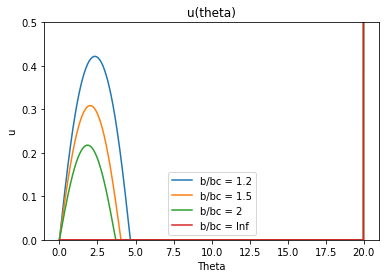

In [6]:
ul1 , upl, th = solve_equadiff(bc)
ul2 , upl, th = solve_equadiff(1.2*bc)
ul3 , upl, th = solve_equadiff(1.5*bc)
ul4 , upl, th = solve_equadiff(2*bc)
ul5 , upl, th = solve_equadiff(10**(10)*bc)

plt.figure()
#plt.plot(th[1],ul1,label='b/bc = {}'.format(str(1)))
plt.plot(th,ul2,label='b/bc = {}'.format(str(1.2)))
plt.plot(th,ul3,label='b/bc = {}'.format(str(1.5)))
plt.plot(th,ul4,label='b/bc = {}'.format(str(2)))
plt.plot(th,ul5,label='b/bc = Inf')
plt.ylim([0,0.5])
plt.xlabel('Theta')
plt.ylabel('u')
plt.title('u(theta)')
plt.legend()
plt.show()


One can compute now the phase portrait of the u fonction

<ipython-input-3-3c2f1d56b07a>:3: RuntimeWarning: overflow encountered in double_scalars
  dudtheta = 3/2*U**2-U
<ipython-input-3-3c2f1d56b07a>:3: RuntimeWarning: invalid value encountered in double_scalars
  dudtheta = 3/2*U**2-U


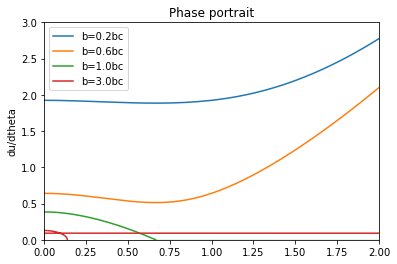

In [7]:
plt.figure()
b=[0.2*bc,0.6*bc,1*bc,3*bc]

for i in range(len(b)):
    ulist, uprimelist,theta = solve_equadiff(b[i])
    
    plt.plot(ulist,uprimelist,label='b='+str(b[i]/bc)+'bc')

plt.xlim([0,2])
plt.ylim([0,3])
plt.title('Phase portrait',loc='center')
plt.ylabel('u')
plt.ylabel('du/dtheta')
plt.legend()
plt.show() 


Looking at the previous graph one can validate the fact that for $b<b_c$ the photon will fall on the Black hole, on the other hand for $b>b_c$ the photon are attracted and the goes bah to infinty with a null speed.

## Accretion Disk

Now that we know how photons propagate we will try to display images of a black hole and its properties.

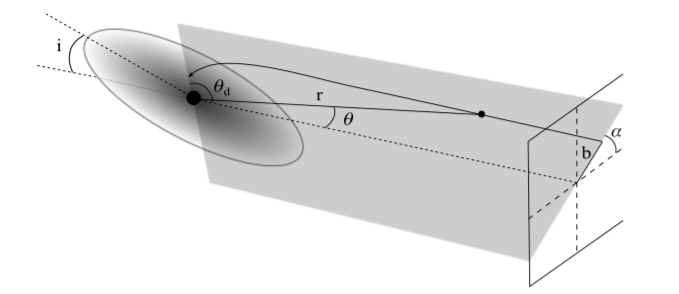

In [8]:
from IPython.display import Image
Image("disque_enonce.png")

We consider a black hole inclined with an angle i compared to the observer. The reverse return of light is valid for Schwaerzchild black hole. Therefore it is possible to goes back from the observer plan, follow back geodesics until finding the black hole disk at radius $r_d$.  
  
In order to simplify we will assume that the unit vector nomal to the accretion disk plan is included in the plan $\alpha=\frac{\pi}{2}$.  
  
A photon leaves the disk at a radius $r_d$ and angle $\theta_d$.

Three dimensional trigonometry gives us :  
$$ cos(\theta_d) = \frac{-sin(\alpha)cos(i)}{\sqrt{1-cos^2(\alpha)cos^2(i))}} $$  
and as we know that the photons are following the geodesics from the moment they leave the disk to the moment they arrive on observer plan one can write :  
$$ r_d=u(\theta_d) $$
with u defined earlier.

In order to consider the computed quantities ( iso-radius, redshift, flux ) we introduces 2 variables x and y defined as following :
$$ x=b*cos(\alpha) $$ and $$ y=b*sin(\alpha) $$

In [9]:
# Parameter to compute the accretion disk
pas = 100
i_list = [ 10*np.pi/180, 40*np.pi/180, 80*np.pi/180]

We first focus on the primary images, that is to say the images made by photons that didn't made a round around the black hole.

In [10]:
def compute_primary(x, y):
    '''
    Fonction in order to compute the photons from primary image, direct photons coming
    '''
    x=x*bc
    y=y*bc
    
    b = np.sqrt(x**2+y**2)
    alpha = (y/b)/(np.abs(y/b))*np.arccos(x/b)
    
    thetad = np.arccos( -np.sin(alpha)*np.cos(i)/np.sqrt(1-np.cos(alpha)**2*np.cos(i)**2) )
    
    if len(thetad)>1:
        fct_u = np.ones((pas,pas))
        for k in range(pas):
            for l in range(pas):

                ul , upl, th = solve_equadiff(b[k][l])
                fct_u[k][l] = abs(1/(interp1d(th,ul,kind='cubic')(thetad[k][l])))


            
              
    else :
        
        fct_u = interp1d(th,ul,kind='cubic')(theta)
    return fct_u



<ipython-input-3-3c2f1d56b07a>:3: RuntimeWarning: overflow encountered in double_scalars
  dudtheta = 3/2*U**2-U
<ipython-input-3-3c2f1d56b07a>:3: RuntimeWarning: invalid value encountered in double_scalars
  dudtheta = 3/2*U**2-U
<ipython-input-11-333ad99eb396>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, rd, cmap = 'inferno')


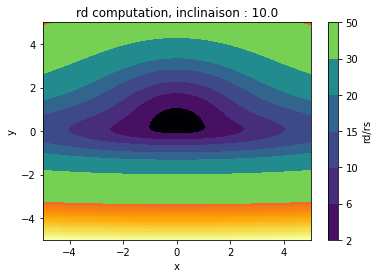

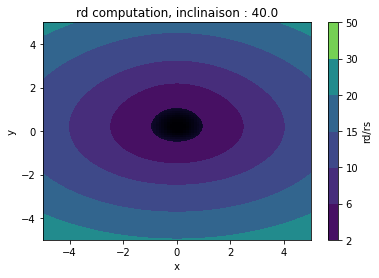

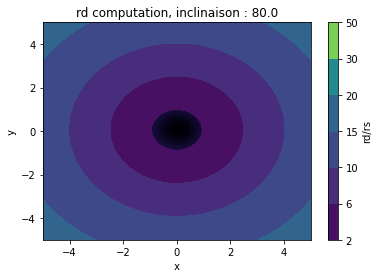

In [11]:
# Plot the map for different inclinaision ( 10, 40, 80 )
for a in range(len(i_list)) :
    i = i_list[a]
    x = np.linspace(-5,5,pas)
    y = np.linspace(-5,5,pas)
    X,Y = np.meshgrid(x, y)
    rd = compute_primary(X,Y)
    
    fig, ax = plt.subplots()
    
    plt.pcolor(X, Y, rd, cmap = 'inferno')
    #cset2 = ax.contour(X, Y, rd, colors='k')
    #cs = ax.contourf(X, Y, rd, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
    level = [2,6,10,15,20,30,50]
    cs = ax.contourf(X, Y, rd,level)
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel('rd/rs')
    plt.ylabel(' y ')
    plt.xlabel(' x ')
    plt.title('rd computation, inclinaison : {}'.format(str(i*180/np.pi)))
    
    plt.show()

- For low disk inclinaision ( 10 degree ) the rays are distorded above the black hole. We can make the hypothesis that these photon come from behind the black hole because of distorded images.
- For higher inclianision ( 80 degree ) iso-radius look like circular and non distorded. This confirm what is said in the previous point.

It is also to compute the secondary images of the black hole, obtained by replacing $\alpha$ by $\alpha + \pi$, that is to says $\theta_d = \pi + arccos \left (\frac{sin(\alpha)cos(i)}{\sqrt{1-cos^2(\alpha)cos^2(i))}} \right )$ but it won't be done here.

The emitted flux by disk surface unity at a distance r from the black hole is :

\begin{align}
    \dfrac{F_{emis}(x)}{F_0} = \dfrac{x^{-5/2}}{x - 3/2} \left[ \sqrt{x} - \sqrt{3} + \sqrt{\dfrac{3}{8}} \  ln \left ( \dfrac{\sqrt{x} + \sqrt{3/2}}{\sqrt{x} - \sqrt{3/2}} \dfrac{\sqrt{2} - 1}{\sqrt{2} + 1} \right )\right ]
\end{align}
with $x=r/r_s$

## Accretion disk luminosity

<ipython-input-12-0a562eebf6ca>:5: RuntimeWarning: invalid value encountered in log
  return facteur*(np.sqrt(x)-np.sqrt(3)+np.sqrt(3/8)*np.log(quotient1*quotient2))


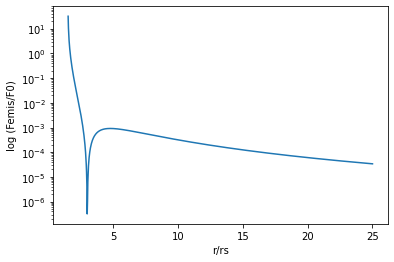

<ipython-input-12-0a562eebf6ca>:2: RuntimeWarning: divide by zero encountered in power
  facteur = x**(-5/2)/(x-3/2)
<ipython-input-12-0a562eebf6ca>:5: RuntimeWarning: invalid value encountered in log
  return facteur*(np.sqrt(x)-np.sqrt(3)+np.sqrt(3/8)*np.log(quotient1*quotient2))


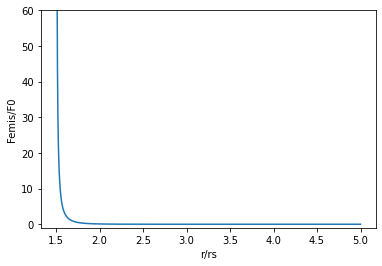

In [12]:
def Femis_F0(x):
    facteur = x**(-5/2)/(x-3/2)
    quotient1 =(np.sqrt(x)+np.sqrt(3/2))/(np.sqrt(x)-np.sqrt(3/2))
    quotient2 = (np.sqrt(2)-1)/(np.sqrt(2)+1)
    return facteur*(np.sqrt(x)-np.sqrt(3)+np.sqrt(3/8)*np.log(quotient1*quotient2))

x_1 = np.linspace(0,5,1000)
x_l = np.linspace(0.1,25,1000)
plt.semilogy(x_l,Femis_F0(x_l))
plt.xlabel('r/rs')
plt.ylabel('log (Femis/F0)')
plt.show()

plt.plot(x_1,Femis_F0(x_1))
plt.xlabel('r/rs')
plt.ylabel('Femis/F0')
plt.ylim([-1,60])
plt.show()

#### Redshift

We then compute the redshift map around the black hole. As its density is very high the redshift around the black hole is modified. We have : 
\begin{align}
1+z = \frac{1}{\sqrt{1-\frac{3}{2x}}}* \left [ 1 + \left ( \dfrac{3}{2x} \right )^{3/2} \dfrac{b}{b_c}\right ]cos(i)cos(\alpha)
\end{align}
The considered redshift map will be computed for a disk between $r_{min}=3r_s$ and $r_{max} >> r_{min}$.

In [13]:
def comparex_3(x,min_x,max_x):
   '''
   Fonction in order to consider only a disk starting at 3rs
   '''
    bool_l = np.ones((len(x[0]), len(x[0])))
    for k in range(len(x[0])):
        for l in range(len(x[0])):
            if x[k][l] < min_x :
               bool_l[k][l] = 10**(20)
            if x[k][l] > max_x :
               bool_l[k][l]  = 10**(20)
    return bool_l




In [14]:
def compute_zbis(x1,y,rad):
    '''
    Fonction in order to compute redshift from formula
    '''
    x1=x1*bc
    y=y*bc
    
    b = np.sqrt(x1**2+y**2)
    alpha = (y/b)/(np.abs(y/b))*np.arccos(x1/b)
    
    x = rad
       
    facteur1 = 1/np.sqrt(1-3/(2*x))
    facteur2 = ( 1 + (3/(2*x))**(3/2)*b/bc*np.cos(i)*np.cos(alpha))
    
    return comparex_3(x,rmin,rmax)*(facteur1*facteur2-1)


<ipython-input-3-3c2f1d56b07a>:3: RuntimeWarning: overflow encountered in double_scalars
  dudtheta = 3/2*U**2-U
<ipython-input-3-3c2f1d56b07a>:3: RuntimeWarning: invalid value encountered in double_scalars
  dudtheta = 3/2*U**2-U
<ipython-input-14-31440c67faff>:10: RuntimeWarning: invalid value encountered in sqrt
  facteur1 = 1/np.sqrt(1-3/(2*x))
<ipython-input-15-d65d54b932f1>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, zbis, cmap = 'inferno')


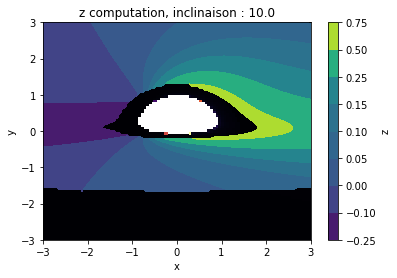

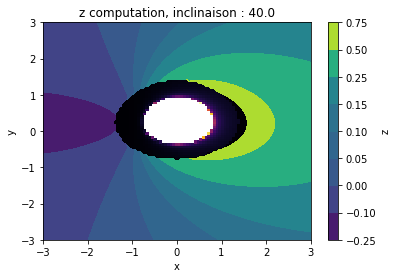

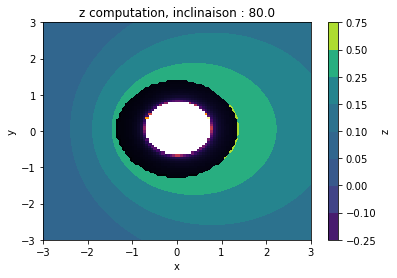

In [15]:
rmin = 3
rmax = 25

# Plot the map for different inclinaision ( 10, 40, 80 )
for a in range(len(i_list)) :
    i = i_list[a]
    x = np.linspace(-3,3,pas)
    y = np.linspace(-3,3,pas)
    X,Y = np.meshgrid(x, y)
    rd = compute_primary(X,Y)
    zbis = compute_zbis(X,Y,rd)
    
    
    fig, ax = plt.subplots()
    plt.pcolor(X, Y, zbis, cmap = 'inferno')
    #cset2 = ax.contour(X, Y, zbis, colors='k')
    #cs = ax.contourf(X, Y, rd, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
    level = [-0.25,-0.1,0,0.05,0.10,0.15,0.25,0.5,0.75]
    cs = ax.contourf(X, Y, zbis,level)
    cbar = fig.colorbar(cs)
    
    cbar.ax.set_ylabel('z')
    plt.ylabel(' y ')
    plt.xlabel('x')
    plt.title('z computation, inclinaison : {}'.format(str(i*180/np.pi)))
    
    plt.show()
    

- There is a huge difference between low inclinaision ( 10 degree ) where a redshift can be spotted on the right and a blueshift ($z<0$) on the left due to rotation of the accretion disk ( Doppler shift due to rotation ). On the other hand for high inclinasion ( 80 degree ) only redshift can be spotted. 
- Redshift values are high above blueshift values. We will then assume that the distorsion induced by the disk rotation can be considered as a little pertubation compared to the distorsion induced by the gravitationnal field.

When the redshift is positive on the redshift map, the flux will decrease meanwhile when the redshift is negative the flux will increase which is coherent with the formula $F_{obs} = \frac{F_{emis}}{(1+z)^4} $. Thanks to this formula it is then possible to compute the flux.

In [16]:
  
pas = 200
i_list=[10*np.pi/180,40*np.pi/180,80*np.pi/180]    
# Comme image visible fonction de x et y
def Fobsbis(rd,z):

    Femis = np.ones((pas,pas))*0
    
    #F0 = 3/4*debm*c**2/(4*np.pi*rs**2)
    #thetad = np.arccos( -np.sin(alpha)*np.cos(i)/np.sqrt(1-np.cos(alpha)**2*np.cos(i)**2) )
    for k in range(pas):
        for l in range(pas):
            if not math.isnan(rd[k][l]):
                if rd[k][l] >= rmin-3 and rd[k][l] <= rmax +150  :
                    facteur = rd[k][l]**(-5/2)/(rd[k][l]-3/2)
                    quotient1 =(np.sqrt(rd[k][l])+np.sqrt(3/2))/(np.sqrt(rd[k][l])-np.sqrt(3/2))
                    quotient2 = (np.sqrt(2)-1)/(np.sqrt(2)+1)
                    Femis[k][l] = (facteur*(np.sqrt(rd[k][l])-np.sqrt(3)+np.sqrt(3/8)*np.log(quotient1*quotient2)))/(z[k][l]+1)**4
    
    Femis = Femis.astype('float64') 
    NAN = np.argwhere(np.isnan(Femis))
    for elem in NAN :
        Femis[elem[0]][elem[1]]=0
       
    return Femis


We now obtain an numerical image of a black hole.

<ipython-input-3-3c2f1d56b07a>:3: RuntimeWarning: overflow encountered in double_scalars
  dudtheta = 3/2*U**2-U
<ipython-input-3-3c2f1d56b07a>:3: RuntimeWarning: invalid value encountered in double_scalars
  dudtheta = 3/2*U**2-U
<ipython-input-14-31440c67faff>:10: RuntimeWarning: invalid value encountered in sqrt
  facteur1 = 1/np.sqrt(1-3/(2*x))
<ipython-input-16-cb897766680f>:17: RuntimeWarning: invalid value encountered in log
  Femis[k][l] = (facteur*(np.sqrt(rd[k][l])-np.sqrt(3)+np.sqrt(3/8)*np.log(quotient1*quotient2)))/(z[k][l]+1)**4
<ipython-input-17-2a6a94ae50dc>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, F,cmap = 'gist_heat')


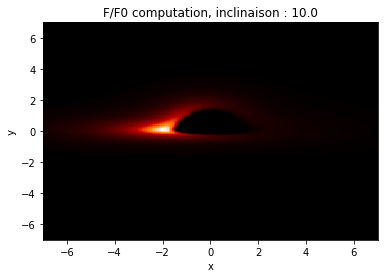

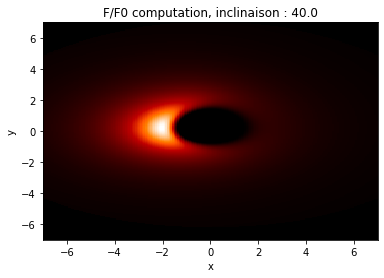

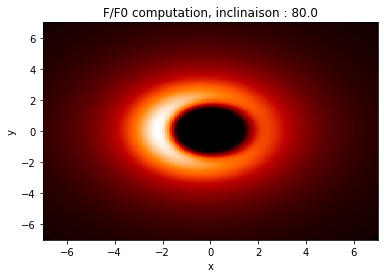

In [17]:
for a in range(len(i_list)) :
    i = i_list[a]
    x = np.linspace(-7,7,pas)
    y = np.linspace(-7,7,pas)
    X,Y = np.meshgrid(x, y)
    
    rd = compute_primary(X,Y)
    zbis = compute_zbis(X,Y,rd)
    F = Fobsbis(rd,zbis)
    fig, ax = plt.subplots()
    plt.pcolor(X, Y, F,cmap = 'gist_heat')
    #level = [0.05,0.10,0.15,0.2,0.3,0.5,0.6,0.9,1.2,1.5,1.8,2.1]*10**(-3)
    #cs = ax.contourf(X, Y, F,level)
    #cset2 = ax.contour(X, Y, F, colors='k')
    #cs = ax.contourf(X, Y, F, locator=ticker.LogLocator(), cmap=cm.Wistia)
    #cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel('Fobs/F0')
    plt.ylabel(' y ')
    plt.xlabel('x')
    plt.title('F/F0 computation, inclinaison : {}'.format(str(i*180/np.pi)))
    
    plt.show()  
